In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [3]:
df = pd.read_csv("train.csv")
print("=== Basic Information ===")
print(df.info(), "\n")
print("=== Summary Statistics ===")
print(df.describe(include='all').T, "\n")
print("Missing values:\n", df.isnull().sum(), "\n")


=== Basic Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

=== Summary Statistics ===
             count unique                  top freq       mean         std  \
PassengerId  891.0    NaN                  NaN  NaN      446.0  257.353842   
Survived     891.0    NaN   

In [4]:
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

In [5]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Deck'] = df['Cabin'].astype(str).str[0]

In [7]:
df['Age'] = df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
# Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Fill Fare with median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

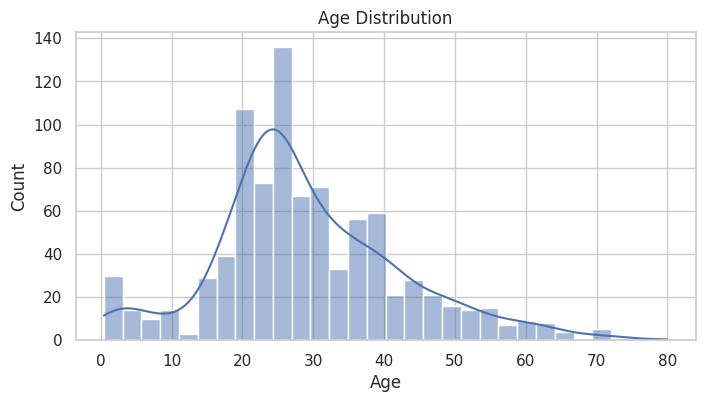

Observation: Most passengers are between 20 and 40 years old.



In [8]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()
print("Observation: Most passengers are between 20 and 40 years old.\n")


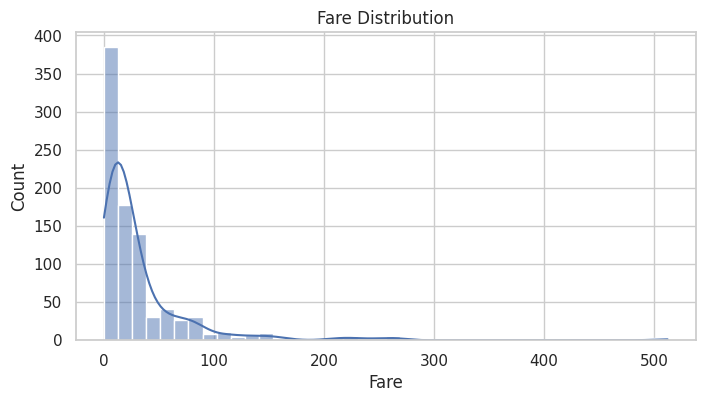

Observation: Fare is right-skewed; most fares are under 50.



In [9]:
plt.figure(figsize=(8,4))
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title('Fare Distribution')
plt.show()
print("Observation: Fare is right-skewed; most fares are under 50.\n")

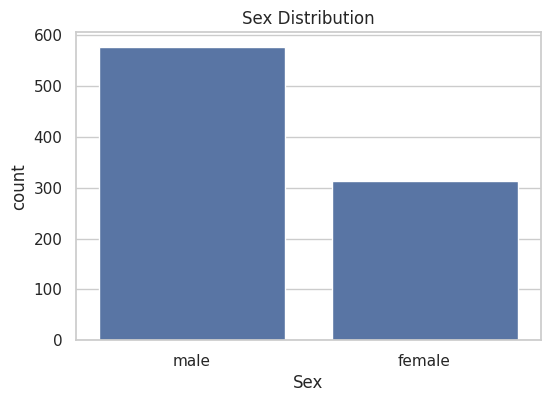

Observation: Males are more than females in this dataset.



In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')
plt.show()
print("Observation: Males are more than females in this dataset.\n")

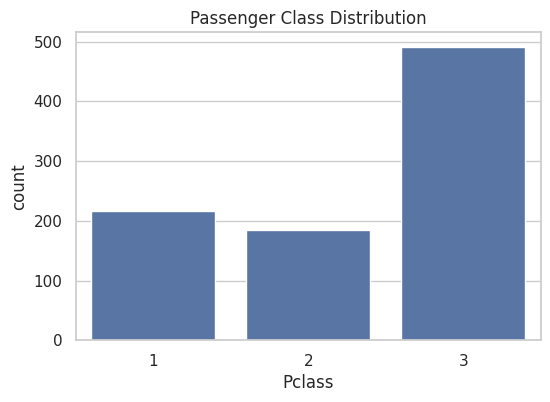

Observation: Most passengers are in 3rd class.



In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()
print("Observation: Most passengers are in 3rd class.\n")

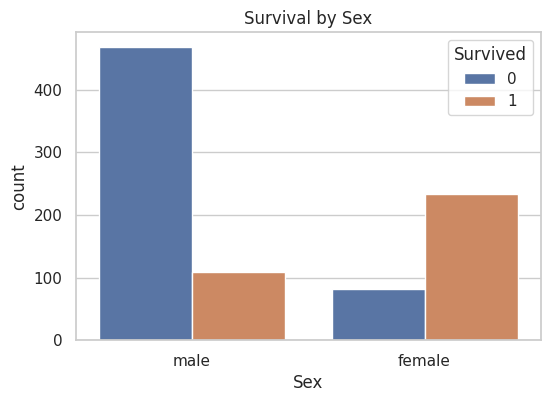

Observation: Higher survival rate for females.



In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()
print("Observation: Higher survival rate for females.\n")


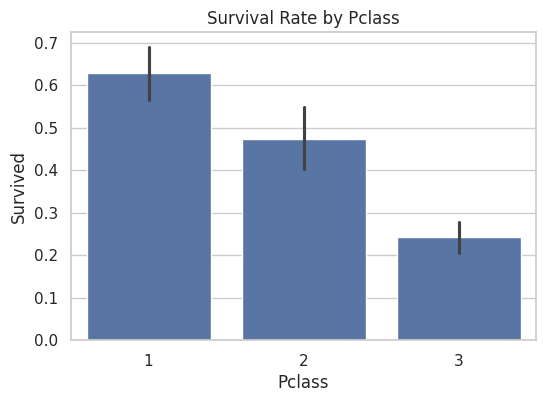

Observation: 1st class passengers had better survival chances.



In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()
print("Observation: 1st class passengers had better survival chances.\n")

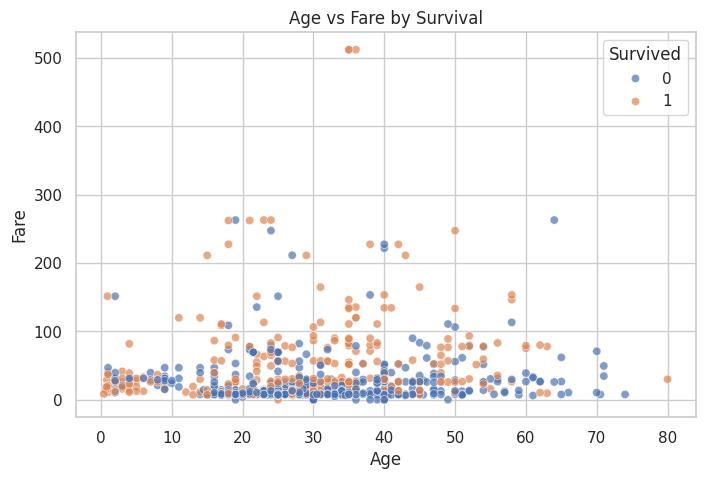

Observation: Younger and high-fare passengers had higher survival rates.



In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.7)
plt.title('Age vs Fare by Survival')
plt.show()
print("Observation: Younger and high-fare passengers had higher survival rates.\n")


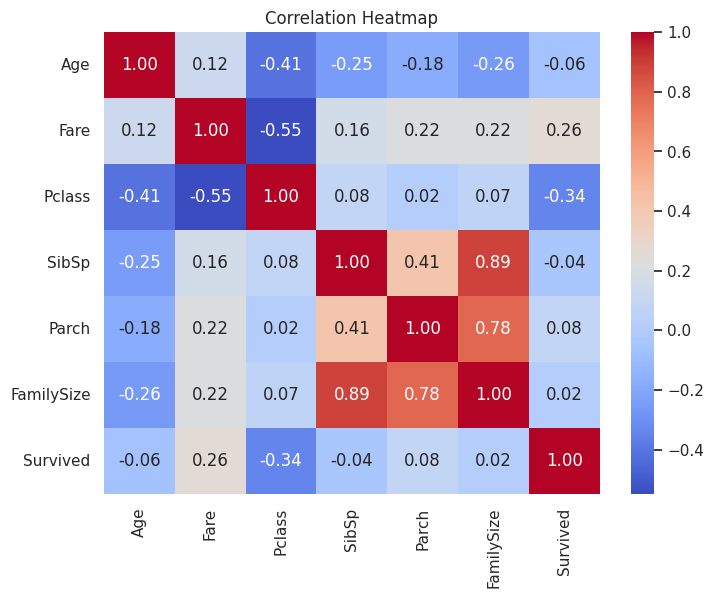

Observation: Fare has a negative correlation with Pclass, and FamilySize correlates with SibSp and Parch.



In [15]:
plt.figure(figsize=(8,6))
corr = df[['Age','Fare','Pclass','SibSp','Parch','FamilySize','Survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
print("Observation: Fare has a negative correlation with Pclass, and FamilySize correlates with SibSp and Parch.\n")

In [16]:
skew_vals = df[['Age','Fare','FamilySize']].apply(lambda x: skew(x.dropna()))
print("Skewness:\n", skew_vals, "\n")

Skewness:
 Age           0.533184
Fare          4.779253
FamilySize    2.722848
dtype: float64 



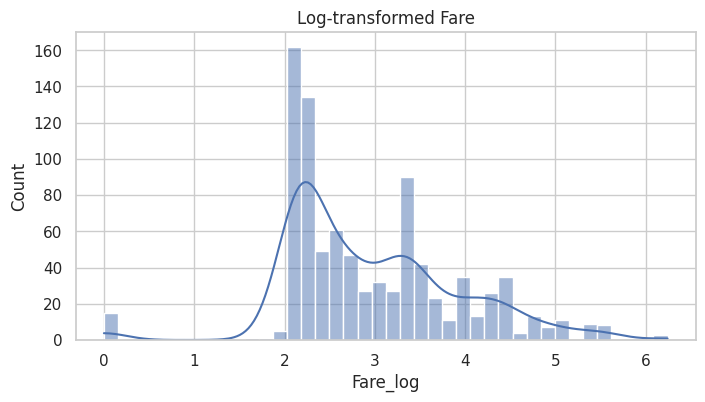

Observation: Log transformation makes Fare distribution more normal.



In [17]:
df['Fare_log'] = np.log1p(df['Fare'])
plt.figure(figsize=(8,4))
sns.histplot(df['Fare_log'], bins=40, kde=True)
plt.title('Log-transformed Fare')
plt.show()
print("Observation: Log transformation makes Fare distribution more normal.\n")

In [18]:
summary = """
=== Summary of Findings ===
1. Females had a much higher survival rate than males.
2. 1st class passengers had higher survival rates compared to other classes.
3. Fare distribution is skewed; log transform improves it.
4. Age mostly between 20–40 years; young passengers survived more often.
5. Family size could be an important feature; large families had lower survival.
"""
print(summary)


=== Summary of Findings ===
1. Females had a much higher survival rate than males.
2. 1st class passengers had higher survival rates compared to other classes.
3. Fare distribution is skewed; log transform improves it.
4. Age mostly between 20–40 years; young passengers survived more often.
5. Family size could be an important feature; large families had lower survival.

